In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [20]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.utils import to_categorical

In [2]:
tf.__version__

'2.15.0'

In [3]:
%load_ext tensorboard

In [4]:
logdir = 'log'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]



In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))



In [ ]:
y_true = test_labels
y_pred = model.predict(test_images)

In [11]:
classes = [0,1,2,3,4,5,6,7,8,9]

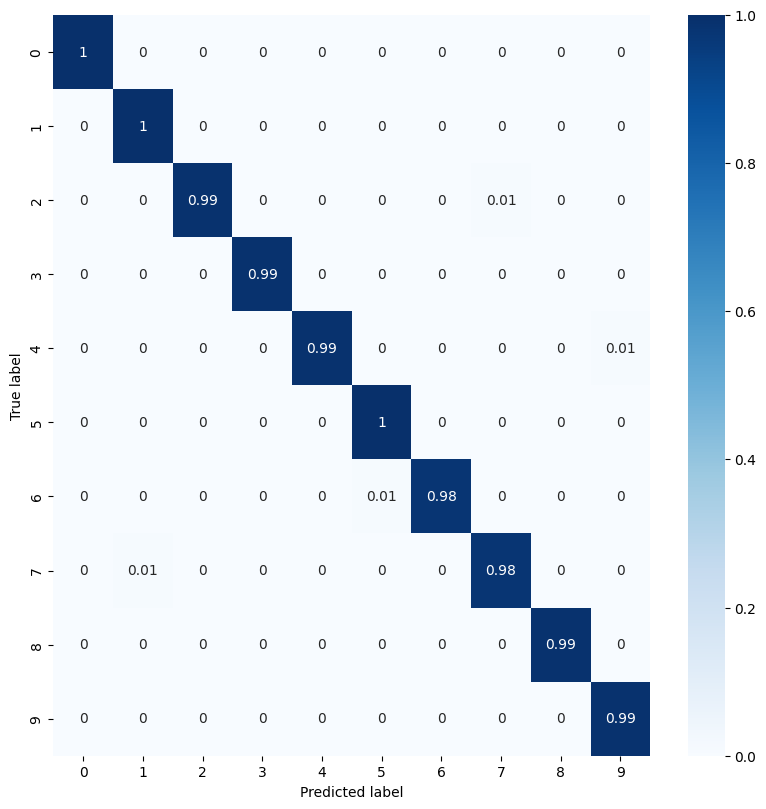

In [19]:
# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy() # Use y_pred_classes
con_mat_norms = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)


con_mat_df = pd.DataFrame(con_mat_norms,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Calcular métricas
report = classification_report(y_true, y_pred_classes, target_names=[str(c) for c in classes])
print(f'Relatório de Classificação:\n{report}')

In [ ]:
# Curva ROC e AUC
# Convertendo labels para one-hot encoding
y_true_onehot = to_categorical(y_true, num_classes=10)

# Calculando curva ROC e AUC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot da Curva ROC
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'olive']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# AUC média
roc_auc_mean = roc_auc_score(y_true_onehot, y_pred, average='macro')
print(f'AUC Média: {roc_auc_mean}')